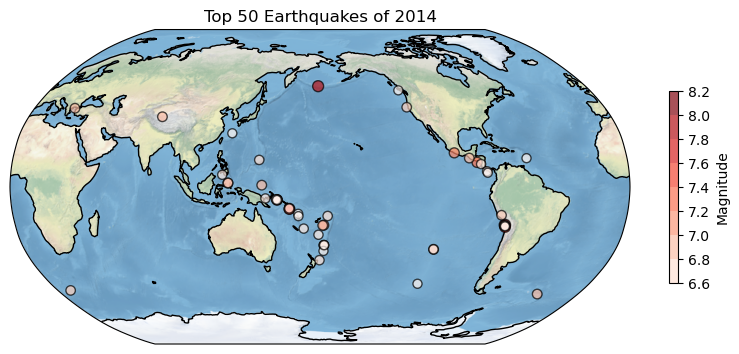

In [4]:
#problem 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
df = pd.read_csv("C:\\ese5023\\usgs_earthquakes.csv")
top_earthquakes = df.nlargest(50, 'mag')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax.set_global()
ax.stock_img()
ax.coastlines()

scatter = ax.scatter(top_earthquakes['longitude'], top_earthquakes['latitude'], 
                     s=top_earthquakes['mag']**2, 
                     c=top_earthquakes['mag'], 
                     cmap='Reds', alpha=0.7, edgecolors='black', transform=ccrs.PlateCarree(),zorder=3)

plt.colorbar(scatter, shrink=0.5, label='Magnitude',boundaries=np.linspace(6.6,8.2,9))
plt.title('Top 50 Earthquakes of 2014')
plt.show()

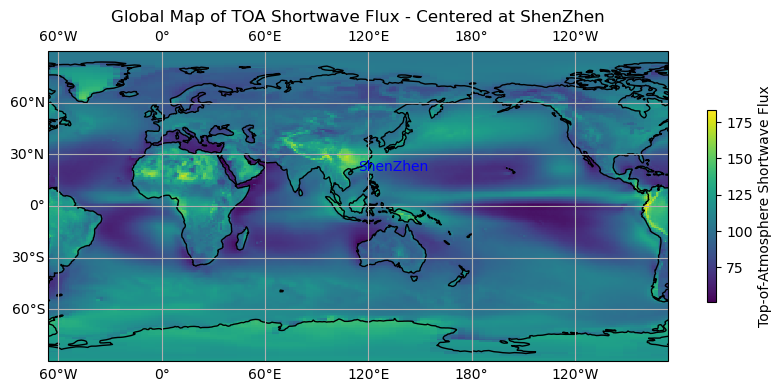

In [21]:
#problem 2.1
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
ds = xr.open_dataset("C:\\ese5023\\CERES_EBAF-TOA_200003-201701.nc")
shenzhen_lon, shenzhen_lat = 114.05, 22.55
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=shenzhen_lon))
toa_sw_all_mon = ds['toa_sw_all_mon']
toa_sw_all_mon.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'shrink': 0.5, 'label': 'Top-of-Atmosphere Shortwave Flux'})

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.text(shenzhen_lon + 0.05, shenzhen_lat, 'ShenZhen', transform=ccrs.PlateCarree(),
        ha='left', va='center', color='blue')
plt.title('Global Map of TOA Shortwave Flux - Centered at ShenZhen')
plt.show()

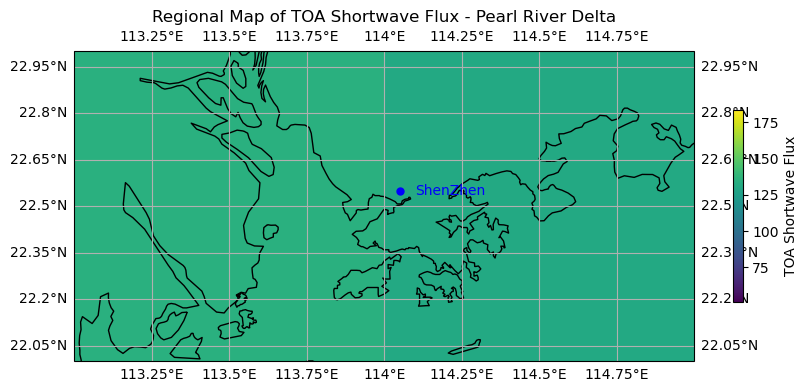

In [16]:
#problem 2.2
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
shenzhen_lon, shenzhen_lat = 114.05, 22.55
lon_min, lon_max, lat_min, lat_max = 113, 115, 22, 23
ds = xr.open_dataset("C:\\ese5023\\CERES_EBAF-TOA_200003-201701.nc")
toa_sw_all_mon = ds['toa_sw_all_mon']
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
toa_sw_all_mon.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(),
                                     cbar_kwargs={'shrink': 0.5, 'label': 'TOA Shortwave Flux'})
ax.plot(shenzhen_lon, shenzhen_lat, 'bo', markersize=5, transform=ccrs.PlateCarree())
ax.text(shenzhen_lon + 0.05, shenzhen_lat, 'ShenZhen', transform=ccrs.PlateCarree(),
        ha='left', va='center', color='blue')
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.title('Regional Map of TOA Shortwave Flux - Pearl River Delta')
plt.show()